# Napari image viewer

Uses the octopuslite dask image loader to automatically sort and load images from multichannel time lapse experiments. Can also use btrack to load associated tracks and segmentation images.

In [1]:
import napari
from octopuslite import DaskOctopusLiteLoader
import glob
import numpy as np

# Load images

In [3]:
# define experiment ID and select a position
expt = 'ND0013'
pos = 'Pos0'
# point to where the data is
root_dir = '/home/nathan/data/kraken/ras'
image_path = f'{root_dir}/{expt}/{pos}/{pos}_images'
transform_paths = glob.glob(f'{root_dir}/{expt}/{pos}/*.npy')
print(transform_paths)
#tracks_path = f'{root_dir}/{expt}/{pos}/tracks.h5'

['/home/nathan/data/kraken/ras/ND0013/Pos0/mask_reversed_transform_tensor.npy', '/home/nathan/data/kraken/ras/ND0013/Pos0/mask_reversed_clipped_transform_tensor.npy', '/home/nathan/data/kraken/ras/ND0013/Pos0/transform_tensor.npy', '/home/nathan/data/kraken/ras/ND0013/Pos0/gfp_transform_tensor.npy', '/home/nathan/data/kraken/ras/ND0013/Pos0/gfp_transform_tensor_clipped.npy']


In [4]:
transform_path = transform_paths[2]
print(transform_path)#'/home/nathan/data/kraken/ras/ND0019/Pos2/mask_reversed_clipped_transform_tensor.npy'

/home/nathan/data/kraken/ras/ND0013/Pos0/transform_tensor.npy


In [5]:
# lazily load images
images = DaskOctopusLiteLoader(image_path, 
                               transforms = transform_path,
                               crop = (1200,1600),
                               remove_background = True)
images.channels

Using cropping: (1200, 1600)


[<Channels.BRIGHTFIELD: 0>,
 <Channels.GFP: 1>,
 <Channels.RFP: 2>,
 <Channels.IRFP: 3>,
 <Channels.MASK: 99>]

In [6]:
gfp = images['gfp']
rfp = images['rfp']
irfp = images['irfp']

# mask_94 = images['MASK_B']
# mask_95 = images['MASK_A']
# mask_96 = images['MASK_IRFP']
# mask_97 = images['MASK_RFP']
# mask_98 = images['MASK_GFP']
mask_99 = images['mask']

# Launch viewer

In [7]:
viewer = napari.Viewer()
# viewer.add_image(rgb, name="rgb C+E", 
#                  contrast_limits=[0,255],
#                  blending = 'additive', colormap = 'green')#, is_pyramid=False)
# # viewer.add_image(bf, name="bf", 
#                  contrast_limits=[0,255],
#                  blending = 'additive',)
viewer.add_image(gfp, name="gfp", 
                 contrast_limits=[0,255],
                 blending = 'additive', colormap = 'green')#, is_pyramid=False)
viewer.add_image(rfp, name="rfp", 
                 contrast_limits=[0,55], 
                 blending = 'additive', colormap = 'magenta')#, is_pyramid=False)
# viewer.add_image(irfp, name="irfp", 
#                  contrast_limits=[0,255], 
#                  blending = 'additive', colormap = 'cyan')

# viewer.add_labels(mask_94.astype(int), name = '94')
# # viewer.add_labels(mask_95.astype(int), name = '95')
# #viewer.add_labels(mask_96.astype(int), name = '96')
# viewer.add_labels(mask_97.astype(int), name = '97')
# viewer.add_labels(mask_98.astype(int), name = '98')
viewer.add_labels(mask_99.astype(int), name = '99 new trans')

# viewer.add_tracks(rfp_tracks)

Assistant skips harvesting pyclesperanto as it's not installed.


__init__.py (165): Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.


<Labels layer '99 new trans' at 0x7f5ec64388e0>

keyframeslist_widget.py (156): Themes were changed to use evented model with Pydantic's color type rather than the `rgb(x, y, z)`. The `as_dict=True` option will be changed to `as_dict=False` in 0.4.15
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarr

Rendering frame  1 of 16


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarr

Rendering frame  2 of 16


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  3 of 16


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  4 of 16


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  5 of 16


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  6 of 16


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  7 of 16


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  8 of 16


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  9 of 16


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  10 of 16


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  11 of 16


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  12 of 16


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  13 of 16


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  14 of 16


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  15 of 16


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


Rendering frame  16 of 16


_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_struct__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array_interface__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
_asarray.py (102): Private attribute access ('ClippingPlaneList.__array__') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0


In [6]:
N = 10 ## number of frames to load

In [31]:
bf = images['brightfield'][1000].compute()

In [9]:
gfp = images['gfp'][1000].compute()
rfp = images['rfp'][1000].compute()
irfp = images['irfp'][1000].compute()

In [58]:
rgb = np.reshape(rgb, (2,1200,1600))

In [51]:
ch1 = gfp
ch2 = rfp

r = ch1.astype(int) 
#g = np.zeros(ch1.shape).astype(int)
b = ch2.astype(int)

In [52]:
rgb = np.dstack((r,b))

In [12]:
for i in [0,250,500,750,1000]:
    viewer = napari.Viewer()
    # viewer.add_image(rgb, name="rgb C+E", 
    #                  contrast_limits=[0,255],
    #                  blending = 'additive', colormap = 'green')#, is_pyramid=False)
    # # viewer.add_image(bf, name="bf", 
    #                  contrast_limits=[0,255],
    #                  blending = 'additive',)
#     viewer.add_image(images['gfp'][i].compute(), name=f"{i} gfp", 
#                      contrast_limits=[0,255],
#                      blending = 'additive', colormap = 'green')#, is_pyramid=False)
#     viewer.add_image(images['rfp'][i].compute(), name="rfp", 
#                      contrast_limits=[0,55], 
#                      blending = 'additive', colormap = 'magenta')#, is_pyramid=False)
    viewer.add_image(irfp, name="irfp", 
                     contrast_limits=[0,255], 
                     blending = 'additive', colormap = 'cyan')#
    # # viewer.add_labels(ras_masks, name = 'ras_mask')

__init__.py (165): Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
__init__.py (165): Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
__init__.py (165): Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
__init__.py (165): Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" 

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=

In [12]:
from skimage.io import imread, imshow
%matplotlib inline

In [13]:
im = imread('/home/nathan/data/kraken/ras/ND0022/Pos12/stardist_high_thresh_mask.tif')

matplotlib_plugin.py (150): Low image data range; displaying image with stretched contrast.


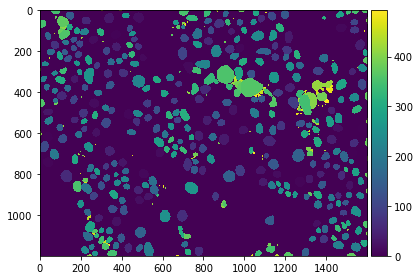

In [14]:
imshow(im)

In [20]:
mask = images['mask'][0].astype(int).compute()

In [23]:
rfp = (mask ==2)

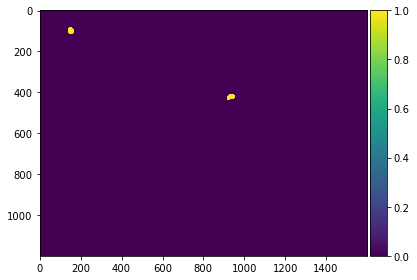

In [28]:
imshow(rfp.astype(int))

In [29]:
import skimage.measure as m

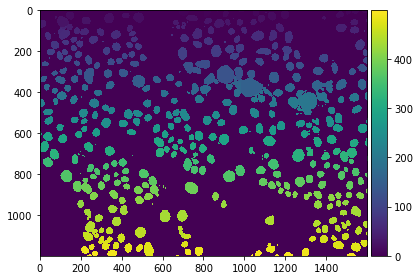

In [31]:
imshow(m.label(im))

In [32]:
label = m.label(im)

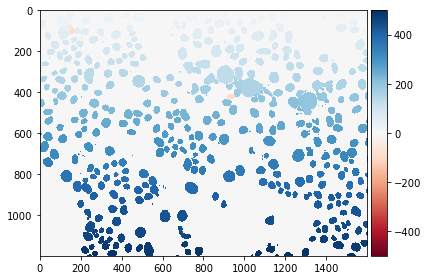

In [35]:
imshow(label+(-100*rfp))

In [33]:
[roi for roi in label]

[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([ 0,  0,  0, ..., 11,  0,  0]),
 array([ 0,  0,  0, ..., 11,  0,  0]),
 array([ 0,  0,  0, ..., 11,  0,  0]),
 array([ 0,  0,  0, ..., 11,  0,  0]),
 array([ 0,  0,  0, ..., 11,  0,  0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0,

In [9]:
viewer = napari.Viewer()
viewer.add_image(gfp[0:N].astype(np.uint8), name="gfp", 
                 contrast_limits=[0,255],
                 blending = 'additive', colormap = 'green')#, is_pyramid=False)
viewer.add_image(rfp[0:N].astype(np.uint8), name="rfp", 
                 contrast_limits=[0,55], 
                 blending = 'additive', colormap = 'magenta')#, is_pyramid=False)
viewer.add_image(irfp[0:N].astype(np.uint8), name="irfp", 
                 contrast_limits=[0,255], 
                 blending = 'additive', colormap = 'cyan')#
viewer.add_labels(nuc_masks[0:N].astype(int), name = 'masks',
#                 contrast_limits=[0,255],
               blending = 'additive',)
viewer.add_labels(ras_masks[0:N].astype(int), name = 'cyto masks',
#                 contrast_limits=[0,255],
               blending = 'additive',)
# viewer.add_tracks(irfp_tracks)
# viewer.add_tracks(rfp_tracks)

ValueError: '/home/nathan/data/kraken/ras/ND0022/Pos12/Pos12_images/img_channel001_position012_time000000006_z000.tif' is not in list

# Ras mask tidier

In [113]:
ras_masks.shape

(219, 1200, 1600)

In [ ]:
for cell_ID, class_label in enumerate(details['class_id'], 1):
    #needs erosion step to stop merging of labels
    segment = nd.binary_erosion(labels==cell_ID)
    mask[segment] = class_label
    # set background to zero
    mask[labels == 0] = 0

### Add tracks

In [66]:
import btrack
from btrack.utils import tracks_to_napari

In [67]:
tracks_path = '/home/nathan/data/kraken/ras/ND0022/Pos12/tracks.h5'

#### GFP tracks

In [68]:
with btrack.dataio.HDF5FileHandler(tracks_path, 
                                   'r', obj_type='obj_type_1'
                                  ) as h:
    gfp_tracks = h.tracks

[INFO][2022/03/30 07:23:36 pm] Opening HDF file: /home/nathan/data/kraken/ras/ND0022/Pos12/tracks.h5...
[INFO][2022/03/30 07:23:36 pm] Loading tracks/obj_type_1
[INFO][2022/03/30 07:23:37 pm] Loading objects/obj_type_1 (308903, 5) (308903 filtered: None)
[INFO][2022/03/30 07:23:43 pm] Closing HDF file: /home/nathan/data/kraken/ras/ND0022/Pos12/tracks.h5


In [18]:
gfp_tracks, gfp_properties, gfp_graph = tracks_to_napari(gfp_tracks, ndim = 2)

#### iRFP tracks

In [ ]:
with btrack.dataio.HDF5FileHandler(tracks_path, 
                                   'r', obj_type='obj_type_1'
                                  ) as h:
    irfp_tracks = h.tracks

In [ ]:
irfp_tracks, irfp_properties, irfp_graph = tracks_to_napari(irfp_tracks, ndim = 2)

#### RFP tracks

In [69]:
with btrack.dataio.HDF5FileHandler(tracks_path, 
                                   'r', obj_type='obj_type_2'
                                  ) as h:
    rfp_tracks = h.tracks

[INFO][2022/03/30 07:23:47 pm] Opening HDF file: /home/nathan/data/kraken/ras/ND0022/Pos12/tracks.h5...
[INFO][2022/03/30 07:23:47 pm] Loading tracks/obj_type_2
[INFO][2022/03/30 07:23:48 pm] Loading objects/obj_type_2 (38765, 5) (38765 filtered: None)
[INFO][2022/03/30 07:23:49 pm] Closing HDF file: /home/nathan/data/kraken/ras/ND0022/Pos12/tracks.h5


In [21]:
rfp_tracks, rfp_properties, rfp_graph = tracks_to_napari(rfp_tracks, ndim = 2)